In [1]:
# Import libraries for all questions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Solution 1

reading data from csv into data frame.

In [2]:
# Using read_csv to read data from the data folder into the data frame
data_df = pd.read_csv('../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv') 

#verifying that the data is in the data frame
data_df.head() 

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


### Solution 2

Adding new columns to the data

i) Calculating the total count of west and east and adding the column to the data frame

In [3]:
# Adding the series of east and west sidewalk and storing it in the series "Total"
Total = data_df['Fremont Bridge East Sidewalk'] + data_df['Fremont Bridge West Sidewalk']

# Adding Total series to data frame
data_df['Total'] = Total

data_df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


ii) Calculating hour of day and adding the column to the data frame

In [4]:
# Converting the date column to a datetime object
dtime = pd.to_datetime(data_df.Date,infer_datetime_format=True)

# Applying an anonymous function on the series to get the hour of day
htime = dtime.apply(lambda x: x.hour)

# Adding htime series to the data frame
data_df['Hour of day'] = htime

data_df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19


iii) Extracting the year from the datetime object and adding the column to the data frame

In [5]:
# Applying an anonymous function on the series to get the year
ytime = dtime.apply(lambda x: x.year)

# Adding ytime series to the data frame
data_df['Year'] = ytime

data_df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour of day,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


### Solution 3

Create a dataframe with the subset of data from the year 2016

In [6]:
data2016_df = data_df[data_df.Year == 2016]

#verifying by describing the year attributr of dataframe
data2016_df.Year.describe()

count    8784.0
mean     2016.0
std         0.0
min      2016.0
25%      2016.0
50%      2016.0
75%      2016.0
max      2016.0
Name: Year, dtype: float64

### Solution 4

Use pandas + matplotlib to plot the counts by hour

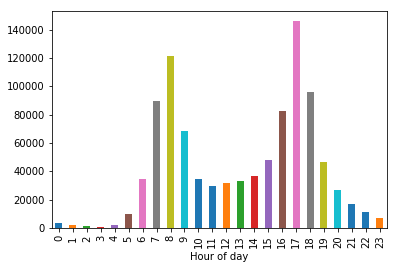

In [7]:
#sum of daily counts grouped by hour of day for 2016
data2016_df.groupby('Hour of day')['Total'].sum().plot(kind='bar')

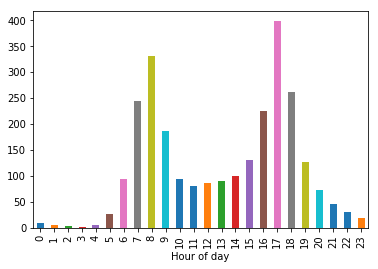

In [8]:
#mean of daily counts grouped by hour of day for 2016
data2016_df.groupby('Hour of day')['Total'].mean().plot(kind='bar')

### Solution 5

determine what is (on average) the busiest hour of the day

In [9]:
# Get average counts for hour of day
average_series = data2016_df.groupby('Hour of day')['Total'].mean()

# Sorting values in descending order
average_series = average_series.sort_values(ascending=False)

#Getting the index for the first element
average_series.index[0]

17